In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls '/content/drive/MyDrive/CNN/Datasets/'

test/  train/


In [ ]:
train_path='/content/drive/MyDrive/CNN/Datasets/train'
valid_path='/content/drive/MyDrive/CNN/Datasets/test'

In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
%cd '/content/drive/MyDrive/CNN/Datasets'

/content/drive/.shortcut-targets-by-id/16i3DsmYfkpADi_3joFqjsEGfoPoa_3ol/CNN/Datasets


In [ ]:
ls '/content/drive/MyDrive/CNN/Datasets/test/COVID19'

'COVID19(460).jpg'  'COVID19(489).jpg'  'COVID19(518).jpg'  'COVID19(547).jpg'
'COVID19(461).jpg'  'COVID19(490).jpg'  'COVID19(519).jpg'  'COVID19(548).jpg'
'COVID19(462).jpg'  'COVID19(491).jpg'  'COVID19(520).jpg'  'COVID19(549).jpg'
'COVID19(463).jpg'  'COVID19(492).jpg'  'COVID19(521).jpg'  'COVID19(550).jpg'
'COVID19(464).jpg'  'COVID19(493).jpg'  'COVID19(522).jpg'  'COVID19(551).jpg'
'COVID19(465).jpg'  'COVID19(494).jpg'  'COVID19(523).jpg'  'COVID19(552).jpg'
'COVID19(466).jpg'  'COVID19(495).jpg'  'COVID19(524).jpg'  'COVID19(553).jpg'
'COVID19(467).jpg'  'COVID19(496).jpg'  'COVID19(525).jpg'  'COVID19(554).jpg'
'COVID19(468).jpg'  'COVID19(497).jpg'  'COVID19(526).jpg'  'COVID19(555).jpg'
'COVID19(469).jpg'  'COVID19(498).jpg'  'COVID19(527).jpg'  'COVID19(556).jpg'
'COVID19(470).jpg'  'COVID19(499).jpg'  'COVID19(528).jpg'  'COVID19(557).jpg'
'COVID19(471).jpg'  'COVID19(500).jpg'  'COVID19(529).jpg'  'COVID19(558).jpg'
'COVID19(472).jpg'  'COVID19(501).jpg'  'COVID19(530

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3), kernel_regularizer='l1'))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu',))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 4609s 57s/step - loss: 1.0909 - accuracy: 0.7593 - val_loss: 0.7158 - val_accuracy: 0.8991
Epoch 2/10
81/81 [==============================] - 213s 3s/step - loss: 0.7167 - accuracy: 0.8828 - val_loss: 0.5935 - val_accuracy: 0.9224
Epoch 3/10
81/81 [==============================] - 212s 3s/step - loss: 0.6237 - accuracy: 0.8950 - val_loss: 0.5570 - val_accuracy: 0.9185
Epoch 4/10
81/81 [==============================] - 212s 3s/step - loss: 0.5819 - accuracy: 0.9010 - val_loss: 0.5148 - val_accuracy: 0.9286
Epoch 5/10
81/81 [==============================] - 212s 3s/step - loss: 0.5458 - accuracy: 0.9166 - val_loss: 0.5028 - val_accuracy: 0.9231
Epoch 6/10
81/81 [==============================] - 210s 3s/step - loss: 0.5100 - accuracy: 0.9246 - val_loss: 0.5149 - val_accuracy: 0.9270
Epoch 7/10
81/81 [==============================] - 209s 3s/step - loss: 0.4921 - accuracy: 0.9267 - val_loss: 0.5207 - val_accuracy: 0.9084
Epoch 8/10


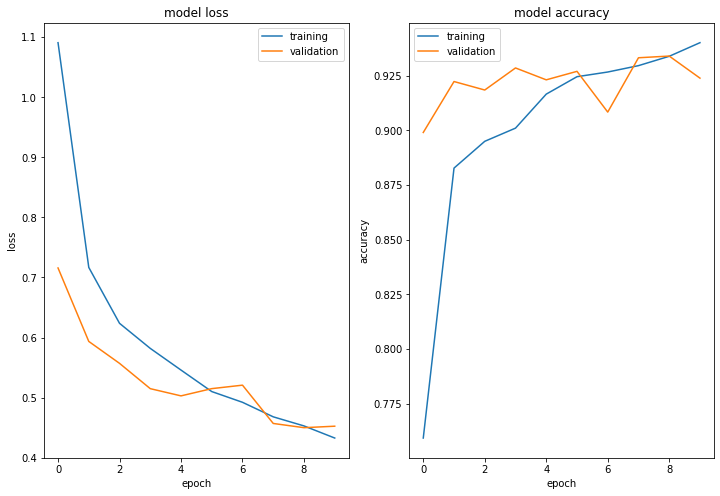

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/CNN/Datasets/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
extensions

['jpg']

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
m = model.fit_generator(training_set, validation_data=test_set, epochs=15,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
81/81 [==============================] - 261s 3s/step - loss: 0.3550 - accuracy: 0.8738 - val_loss: 47.3396 - val_accuracy: 0.0901
Epoch 2/15
81/81 [==============================] - 246s 3s/step - loss: 0.1861 - accuracy: 0.9360 - val_loss: 2.3014 - val_accuracy: 0.0901
Epoch 3/15
81/81 [==============================] - 248s 3s/step - loss: 0.1741 - accuracy: 0.9427 - val_loss: 19.3522 - val_accuracy: 0.0901
Epoch 4/15


KeyboardInterrupt: ignored

In [ ]:
train_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
test_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-8]:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
m = model.fit_generator(training_set, validation_data=test_set, epochs=15,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
81/81 [==============================] - 208s 2s/step - loss: 0.2681 - accuracy: 0.9079 - val_loss: 143.8341 - val_accuracy: 0.3649
Epoch 2/15
81/81 [==============================] - 199s 2s/step - loss: 0.1523 - accuracy: 0.9526 - val_loss: 1.6059 - val_accuracy: 0.7950
Epoch 3/15
81/81 [==============================] - 199s 2s/step - loss: 0.1310 - accuracy: 0.9545 - val_loss: 1.2570 - val_accuracy: 0.8742
Epoch 4/15
81/81 [==============================] - 199s 2s/step - loss: 0.0838 - accuracy: 0.9736 - val_loss: 6.0958 - val_accuracy: 0.7104
Epoch 5/15
81/81 [==============================] - 199s 2s/step - loss: 0.0851 - accuracy: 0.9685 - val_loss: 0.2053 - val_accuracy: 0.9286
Epoch 6/15
81/81 [==============================] - 200s 2s/step - loss: 0.0669 - accuracy: 0.9769 - val_loss: 1.7058 - val_accuracy: 0.8059
Epoch 7/15
81/81 [==============================] - 199s 2s/step - loss: 0.0739 - accuracy: 0.9728 - val_loss: 0.2884 - val_accuracy: 0.9317
Epoch 8/15


In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-2]:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0005), metrics= ["accuracy"])

In [ ]:
m = model.fit(training_set, validation_data=test_set, epochs=15,verbose=1)

Epoch 1/15
81/81 [==============================] - 1999s 24s/step - loss: 0.4280 - accuracy: 0.9094 - val_loss: 0.5042 - val_accuracy: 0.8843
Epoch 2/15
81/81 [==============================] - 156s 2s/step - loss: 0.1315 - accuracy: 0.9592 - val_loss: 0.1792 - val_accuracy: 0.9519
Epoch 3/15
81/81 [==============================] - 154s 2s/step - loss: 0.0910 - accuracy: 0.9693 - val_loss: 1.4200 - val_accuracy: 0.8820
Epoch 4/15
81/81 [==============================] - 153s 2s/step - loss: 0.0638 - accuracy: 0.9788 - val_loss: 0.4383 - val_accuracy: 0.9138
Epoch 5/15
81/81 [==============================] - 154s 2s/step - loss: 0.0586 - accuracy: 0.9808 - val_loss: 0.1578 - val_accuracy: 0.9682
Epoch 6/15
81/81 [==============================] - 153s 2s/step - loss: 0.0808 - accuracy: 0.9765 - val_loss: 0.2372 - val_accuracy: 0.9387
Epoch 7/15
81/81 [==============================] - 152s 2s/step - loss: 0.0795 - accuracy: 0.9726 - val_loss: 0.2653 - val_accuracy: 0.9418
Epoch 8/15


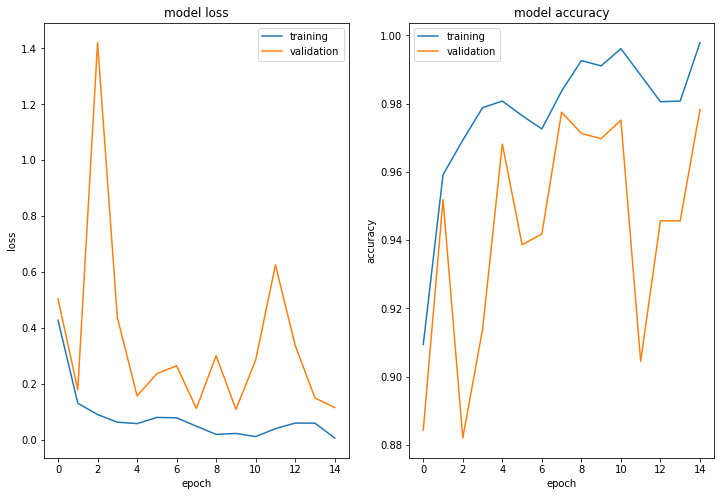

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-2]:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0005), metrics= ["accuracy"])

In [ ]:
m = model.fit(training_set, validation_data=test_set, epochs=30,verbose=1)

Epoch 1/30
81/81 [==============================] - 166s 2s/step - loss: 0.4953 - accuracy: 0.9156 - val_loss: 5.6664 - val_accuracy: 0.8571
Epoch 2/30
81/81 [==============================] - 160s 2s/step - loss: 0.1078 - accuracy: 0.9619 - val_loss: 0.3167 - val_accuracy: 0.9301
Epoch 3/30
81/81 [==============================] - 157s 2s/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.1757 - val_accuracy: 0.9557
Epoch 4/30
81/81 [==============================] - 156s 2s/step - loss: 0.0532 - accuracy: 0.9825 - val_loss: 0.4071 - val_accuracy: 0.9441
Epoch 5/30
81/81 [==============================] - 157s 2s/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.1253 - val_accuracy: 0.9627
Epoch 6/30
81/81 [==============================] - 156s 2s/step - loss: 0.0478 - accuracy: 0.9872 - val_loss: 0.9356 - val_accuracy: 0.8036
Epoch 7/30
81/81 [==============================] - 155s 2s/step - loss: 0.0386 - accuracy: 0.9864 - val_loss: 0.3685 - val_accuracy: 0.9402
Epoch 8/30
81

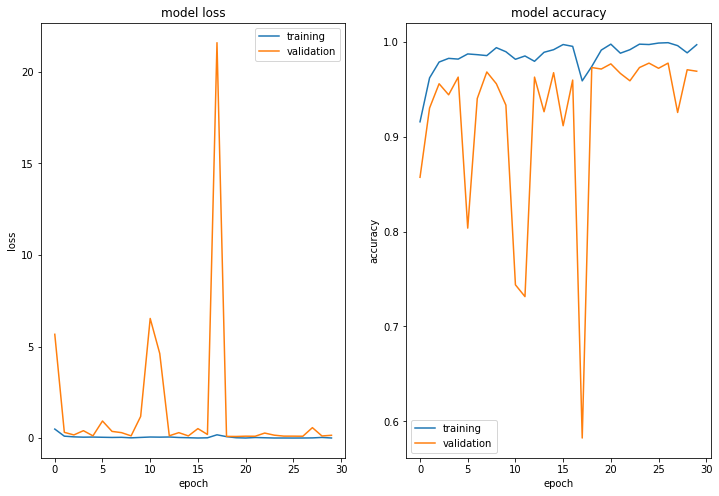

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-2]:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0001), metrics= ["accuracy"])

In [ ]:
m = model.fit(training_set, validation_data=test_set, epochs=15,verbose=1)

Epoch 1/15
81/81 [==============================] - 172s 2s/step - loss: 0.4689 - accuracy: 0.8795 - val_loss: 0.2409 - val_accuracy: 0.9123
Epoch 2/15
81/81 [==============================] - 163s 2s/step - loss: 0.0802 - accuracy: 0.9745 - val_loss: 0.1179 - val_accuracy: 0.9557
Epoch 3/15
81/81 [==============================] - 166s 2s/step - loss: 0.0378 - accuracy: 0.9856 - val_loss: 0.1108 - val_accuracy: 0.9643
Epoch 4/15
81/81 [==============================] - 161s 2s/step - loss: 0.0201 - accuracy: 0.9928 - val_loss: 0.1265 - val_accuracy: 0.9612
Epoch 5/15
81/81 [==============================] - 162s 2s/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.1394 - val_accuracy: 0.9635
Epoch 6/15
81/81 [==============================] - 161s 2s/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.2538 - val_accuracy: 0.9433
Epoch 7/15
81/81 [==============================] - 158s 2s/step - loss: 0.0211 - accuracy: 0.9944 - val_loss: 0.1099 - val_accuracy: 0.9705
Epoch 8/15
81

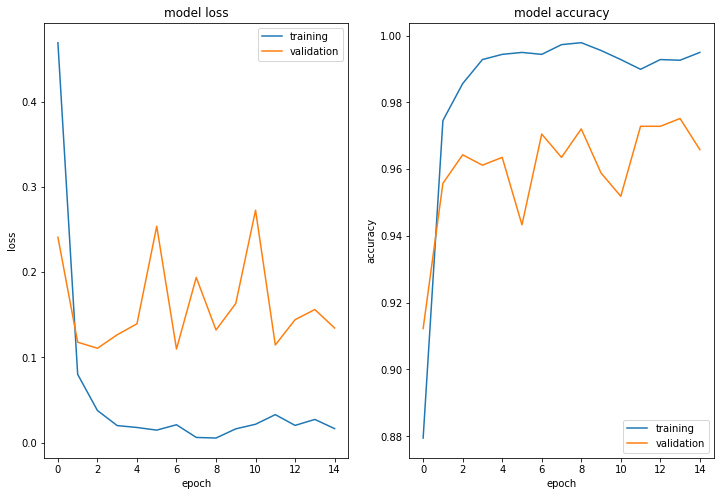

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-2]:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0001), metrics= ["accuracy"])

In [ ]:
m = model.fit(training_set, validation_data=test_set, epochs=30,verbose=1)

Epoch 1/30
81/81 [==============================] - 163s 2s/step - loss: 0.5187 - accuracy: 0.8892 - val_loss: 0.3929 - val_accuracy: 0.9099
Epoch 2/30
81/81 [==============================] - 157s 2s/step - loss: 0.0727 - accuracy: 0.9751 - val_loss: 0.2352 - val_accuracy: 0.9425
Epoch 3/30
81/81 [==============================] - 155s 2s/step - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.3369 - val_accuracy: 0.9006
Epoch 4/30
81/81 [==============================] - 155s 2s/step - loss: 0.0308 - accuracy: 0.9883 - val_loss: 0.3028 - val_accuracy: 0.9216
Epoch 5/30
81/81 [==============================] - 168s 2s/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.1679 - val_accuracy: 0.9488
Epoch 6/30
81/81 [==============================] - 155s 2s/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.1783 - val_accuracy: 0.9589
Epoch 7/30
81/81 [==============================] - 156s 2s/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.1554 - val_accuracy: 0.9689
Epoch 8/30
81

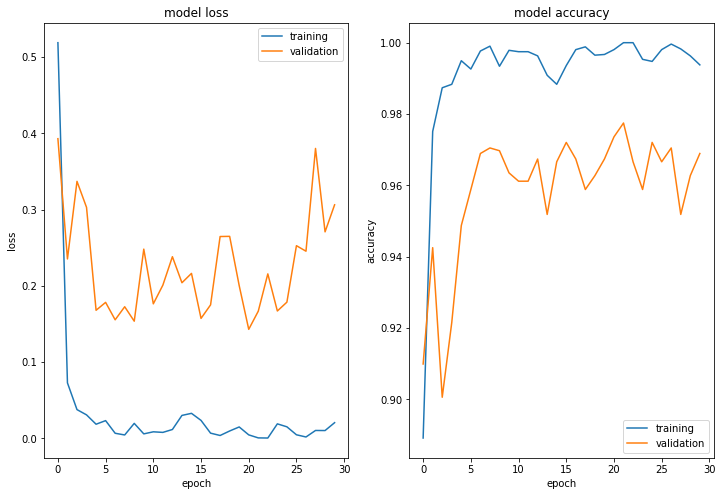

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')